<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [26]:
import pandas as pd
import psycopg2
import plotly.express as px

In [27]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 
USER = 
PASSWORD =
HOST = 
PORT = 

In [31]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [11]:
# текст запроса
query_3_1 = f'''
            SELECT count(distinct id)
            FROM public.vacancies
'''
result_3_1 = pd.read_sql_query(query_3_1, connection)
result_3_1

C:\Users\ak88r\AppData\Local\Temp\ipykernel_8496\2250140550.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,49197


#### результат запроса по заданию 3.1.
В базе 49197 уникальных вакансий

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
            SELECT count(distinct id)
            FROM public.employers
'''
result_3_2 = pd.read_sql_query(query_3_2, connection)
result_3_2


C:\Users\ak88r\AppData\Local\Temp\ipykernel_16180\400302541.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_2 = pd.read_sql_query(query_3_2, connection)


,count
0,23501


#### результат запроса по заданию 3.2.
В базе представлены данные о 23501 работодателе

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [7]:
# текст запроса

query_3_3 = f'''
            SELECT count(distinct id)
            FROM public.areas
'''
result_3_3 = pd.read_sql_query(query_3_3, connection)
result_3_3

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16180\1607566767.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_3 = pd.read_sql_query(query_3_3, connection)


,count
0,1362


#### результат запроса по заданию 3.3.
База данных включает в себя данные о 1362 регионах

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [8]:
# текст запроса
query_3_4 = f'''
            SELECT count(distinct id)
            FROM public.industries
'''
result_3_4 = pd.read_sql_query(query_3_4, connection)
result_3_4

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16180\677901825.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_4 = pd.read_sql_query(query_3_4, connection)


,count
0,294


#### результат запроса по заданию 3.4.
В базе данных 294 сферы деятельности

***

### выводы по предварительному анализу данных
Общий вывод из предварительного анализа данных - в базе данных представлены
сведения о 49197 вакансиях от 23501 работодателя из 294 сфер деятельности, 
размещенных в 1362 регионах

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [4]:
# текст запроса
query_4_1 = f'''
            SELECT 
                a.name,
                count(v.id)
            FROM 
                public.vacancies v
            JOIN
                public.areas a
                ON
                v.area_id = a.id
            GROUP BY
                a.name
            ORDER BY
                2 DESC
'''
result_4_1 = pd.read_sql_query(query_4_1, connection)
result_4_1

C:\Users\ak88r\AppData\Local\Temp\ipykernel_8496\3817932107.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_4_1 = pd.read_sql_query(query_4_1, connection)


,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


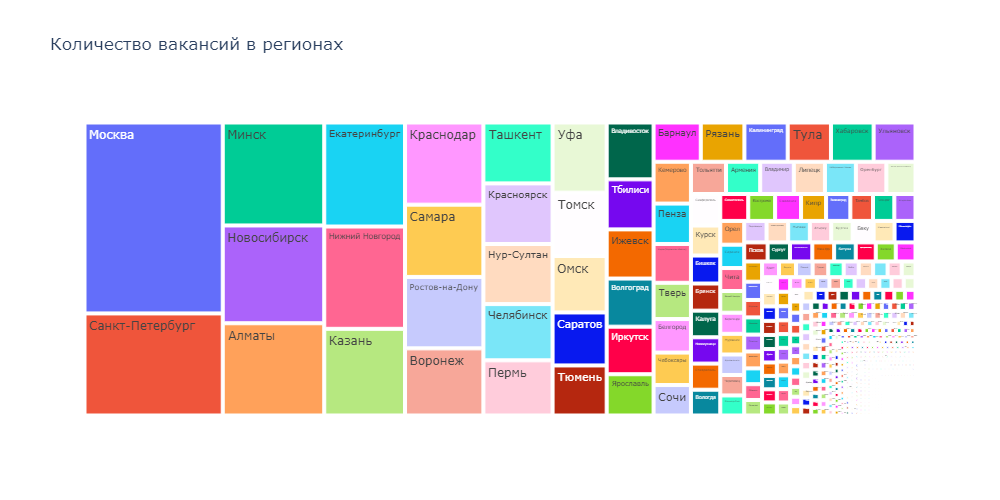

In [6]:
# результат запроса по заданию 4.1.
fig = px.treemap(
    data_frame=result_4_1, 
    path=['name'], 
    values='count', 
    height=500, 
    width=1000, 
    title='Количество вакансий в регионах' 

fig.show("png")

Вывод: 
Топ-5 регионов по количеству вакансий: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы
В базе данных представлены регионы РФ и страны - Белоруссия, Казахстан, Узбекистан, Грузия.
Основная доля вакансий приходится на города-миллионники РФ и столицы указанных стран.

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [12]:
# текст запроса

query_4_2 = f'''
            SELECT 
                count(id)
            FROM 
                public.vacancies 
            WHERE
                salary_from is not null
                OR
                salary_to is not null
'''
result_4_2 = pd.read_sql_query(query_4_2, connection)
result_4_2

C:\Users\ak88r\AppData\Local\Temp\ipykernel_8496\2286202664.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,24073


#### результат запроса по заданию 4.2.
В базе данных 24073 вакансии с информацией о заработной плате, что составляет менее половины всего количества данных (49%). 
Это может быть объяснено тем, что работодатели предпочитают сообщать об уровне дохода в ходе собеседования с ориентацией на ожидания соискателя.

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [18]:
# текст запроса
query_4_3 = f'''
            SELECT 
                round(AVG(salary_from),0) AS "сзп_минимум",
                round(AVG(salary_to),0) AS "сзп_максимум"
            FROM 
                public.vacancies 
           
'''
result_4_3 = pd.read_sql_query(query_4_3, connection)
result_4_3

C:\Users\ak88r\AppData\Local\Temp\ipykernel_8496\3533397233.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,сзп_минимум,сзп_максимум
0,71065.0,110537.0


#### результат запроса по заданию 4.3.
Средние значения границ зарплатной вилки составляют от 71065 до 110537 рублей

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [41]:
# текст запроса
query_4_4 = f'''
            SELECT 
                schedule "Рабочий график",
                employment "Тип трудоустройства",
                COUNT(id) "Количество вакансий"
            FROM 
                public.vacancies
            GROUP BY
                schedule, employment
            ORDER BY
                3 DESC
           
'''
result_4_4 = pd.read_sql_query(query_4_4, connection)
result_4_4

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16596\3649414524.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Рабочий график,Тип трудоустройства,Количество вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


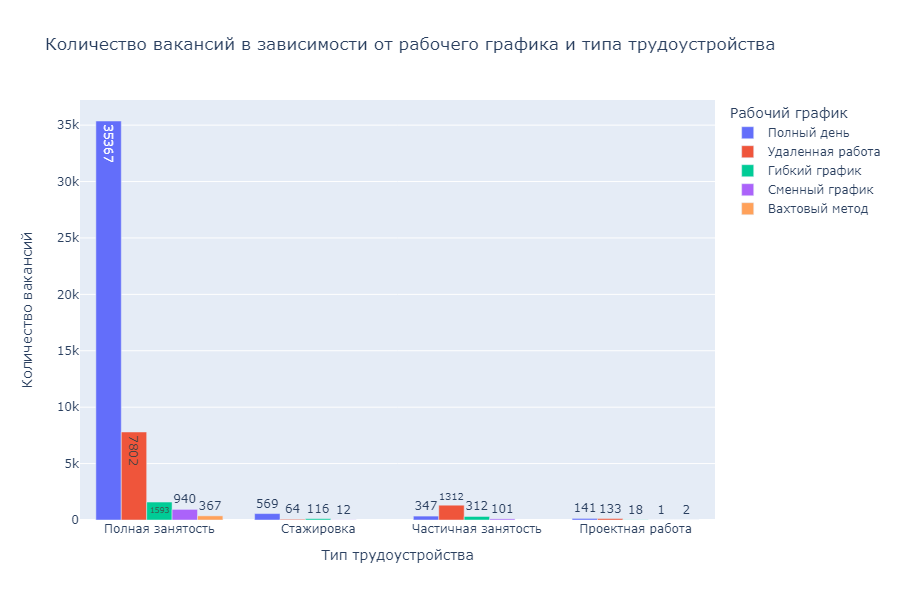

In [44]:
# результат запроса по заданию 4.4.
vacancies_count = px.bar(
    data_frame = result_4_4,
    x = 'Тип трудоустройства',
    y = 'Количество вакансий',
    color = 'Рабочий график',
    text = 'Количество вакансий',
    barmode='group',
    orientation = 'v',
    height = 600,
    width = 900,
    title = 'Количество вакансий в зависимости от рабочего графика и типа трудоустройства'
    )

vacancies_count.show("png")

Вывод:
Более 70% вакансий предполагают полную занятость на полный рабочий день. На втором месте - полная занятость в режиме удаленной работы.
Удаленная работа также преимущественно выражена для частичной занятости.


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [40]:
# текст запроса

query_4_5 = f'''
            SELECT 
                experience "Требуемый опыт",
                COUNT(id) "Количество вакансий"
            FROM 
                public.vacancies
            GROUP BY
                experience
            ORDER BY
                2 
           
'''
result_4_5 = pd.read_sql_query(query_4_5, connection)
result_4_5

C:\Users\ak88r\AppData\Local\Temp\ipykernel_8496\1612467909.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Требуемый опыт,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


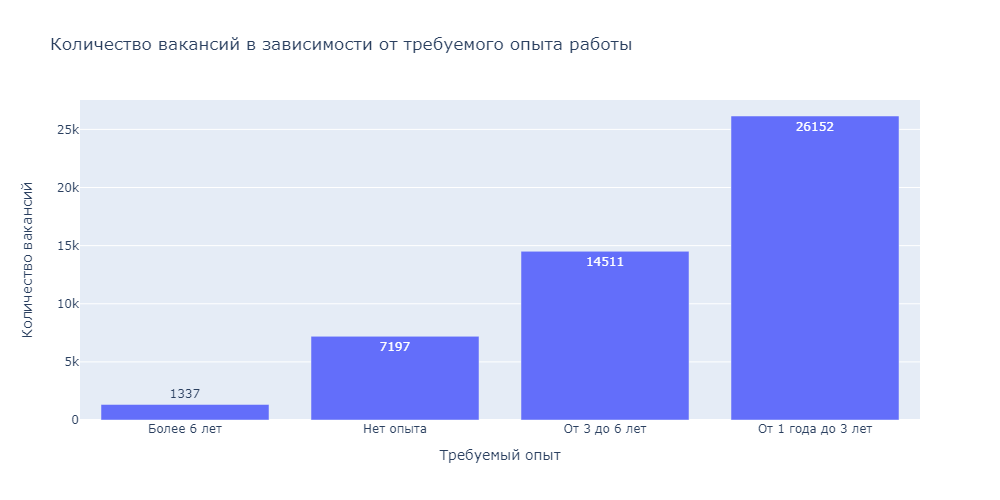

In [42]:
# результат запроса по заданию 4.5.

fig = px.bar(
    data_frame=result_4_5, 
    x="Требуемый опыт", 
    y="Количество вакансий", 
    #color='country', 
    text = 'Количество вакансий', 
    orientation='v', 
    height=500, 
    width=1000, 
    title='Количество вакансий в зависимости от требуемого опыта работы' 
)

fig.show("png")

***

Вывод:
Более половины вакансий (53%) с требованием опыта от 1 года до 3 лет. Наименьшая доля - 1337 вакансий - с опытом более 6 лет.
Вакансии с большим опытом работы, как правило, относятся к ведущим и руководящим должностям, что объясняет их небольшое количество.
Также работодатели прдеполчитают соискателей с наличием минимального опыта, так как наличие опыта сокращает период адаптации на
рабочем месте, поэтому вакансии с опытом (категории от 1 года до 3 лет и от 3 до 6 лет) кратно превышают количество вакансий без опыта. 

### выводы по детальному анализу вакансий
Детальный анализ показывает, что вакансии сосредоточены в городах-миллионниках, в основном к соискателям
предъявляются требования наличия минимального опыта работы, готовности к полной занятости полный рабочий день. Предложения
по заработной плате начинаются в среднем от 70 тысяч рублей, при этом более половины вакансий не содержит сведений об уровне
вознаграждения, что, вероятно, связано с предпочтением работодателей обсуждать уровень оплаты труда на стадии собеседования.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [44]:
# текст запроса
query_5_1 = f'''
            SELECT 
                e.name "Работодатели",
                COUNT(v.id) "Количество вакансий"
            FROM 
                public.employers e
            JOIN
                public.vacancies v
                ON
                v.employer_id = e.id
            GROUP BY
                e.name
            ORDER BY
                2 DESC
           
'''
result_5_1 = pd.read_sql_query(query_5_1, connection)
result_5_1

C:\Users\ak88r\AppData\Local\Temp\ipykernel_8496\3933735357.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатели,Количество вакансий
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
14761,им. Тьюринга,1
14762,LLC Novalab Tech,1
14763,Компания Мир упаковки,1
14764,Лифинцев Олег Иванович,1


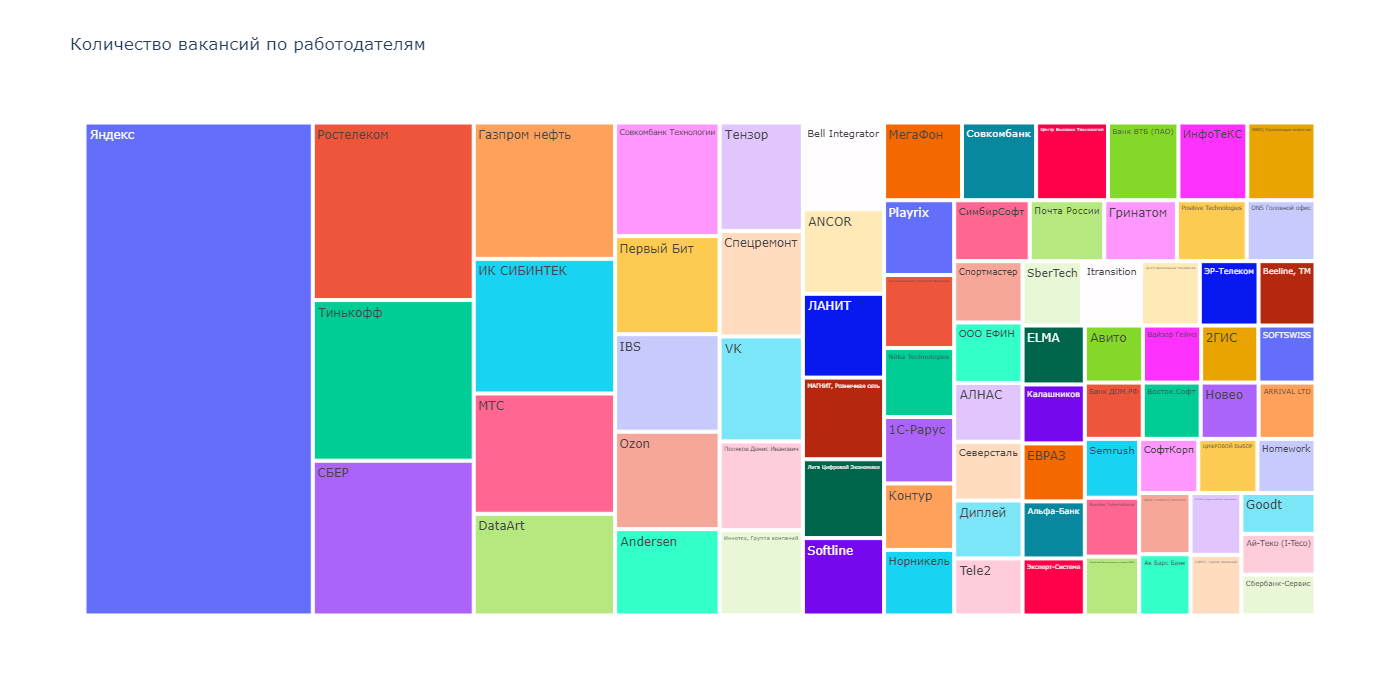

In [49]:
# результат запроса по заданию 5.1.

fig_employers = px.treemap(
    data_frame=result_5_1[result_5_1['Количество вакансий'] > 50], 
    path=['Работодатели'], 
    values='Количество вакансий', 
    height=700, 
    width=1400, 
    title='Количество вакансий по работодателям') 

fig_employers.show("png")

Вывод:
Лидером по количеству вакансий среди работодателей является Яндекс, далее следуют компании Ростелеком, Тинькофф, СБЕР, Газпром нефть.

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [6]:
# текст запроса

query_5_2 = f'''
            SELECT 
                a.name ,
                COUNT(v.id) vacancies,
                COUNT(e.id) emps
            FROM 
                public.areas a 
            LEFT JOIN
                public.vacancies v
                ON
                v.area_id = a.id
            LEFT JOIN
                public.employers e
                ON
                e.area = a.id
            GROUP BY
                a.name
            HAVING
                COUNT(v.id) = 0 
            ORDER BY
                3 DESC
            
           
'''
result_5_2 = pd.read_sql_query(query_5_2, connection)
result_5_2

C:\Users\ak88r\AppData\Local\Temp\ipykernel_11848\611325548.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_2 = pd.read_sql_query(query_5_2, connection)


,name,vacancies,emps
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


#### результат запроса по заданию 5.2.
В числе регионов есть позиции с 0 вакансий как с наличием работодателей, так и с аналогичным нулевым значением.
Регионы с наибольшим количеством работодателей и 0 вакансий - Россия, Казахстан. Вероятно, работодатели отразили вакансии
в регионах для конкретизации потребности и локализации вакансии, указывая при этом в информации о себе принадлежность
к стране.

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [56]:
# текст запроса
query_5_3 = f'''
            SELECT 
                e.name "Работодатели",
                COUNT(distinct area_id) "Количество регионов"
            FROM 
                public.vacancies v
            JOIN
                public.employers e
                ON
                v.employer_id = e.id
            GROUP BY
                e.name
            ORDER BY
                2 DESC
           
'''
result_5_3 = pd.read_sql_query(query_5_3, connection)
result_5_3

C:\Users\ak88r\AppData\Local\Temp\ipykernel_8496\4949238.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатели,Количество регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


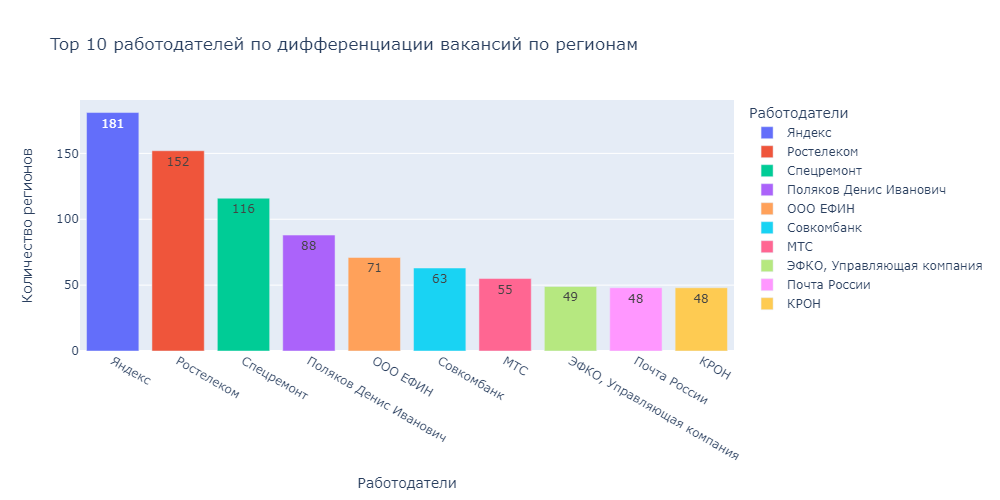

In [58]:
# результат запроса по заданию 5.3.

emp_areas = px.bar(
    data_frame=result_5_3.nlargest(10, columns='Количество регионов'),
    x="Работодатели", 
    y="Количество регионов", 
    color='Работодатели', 
    text = 'Количество регионов', 
    orientation='v', 
    height=500, 
    width=1000, 
    title='Top 10 работодателей по дифференциации вакансий по регионам' 
)


emp_areas.show("png")

Вывод:
Лидером по количеству регионов с размещенными вакансиями является Яндекс (181 регион), далее следуют Ростелеком (152 региона)
и Спецремонт (116 регионов).  

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
# текст запроса
query_5_4 = f'''
            SELECT 
                COUNT(e.id)
            FROM 
                public.employers e
            LEFT JOIN
                public.employers_industries ei
                ON
                ei.employer_id = e.id
            GROUP BY
                ei.industry_id
            HAVING
                ei.industry_id is null                       
'''
result_5_4 = pd.read_sql_query(query_5_4, connection)
result_5_4

C:\Users\ak88r\AppData\Local\Temp\ipykernel_9936\824710864.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_4 = pd.read_sql_query(query_5_4, connection)


,count
0,8419


#### результат запроса по заданию 5.4.
8419 работодателей (36%) не указали сферу своей деятельности

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [20]:
# текст запроса

query_5_5 = f'''
            SELECT 
                e.name
            FROM 
                public.employers e
            LEFT JOIN
                public.employers_industries ei
                ON
                ei.employer_id = e.id
            GROUP BY
                e.name
            HAVING
                COUNT(ei.industry_id) = 4
            ORDER BY
                1
            LIMIT 1 OFFSET 2                       
'''
result_5_5 = pd.read_sql_query(query_5_5, connection)
result_5_5

C:\Users\ak88r\AppData\Local\Temp\ipykernel_9936\3810164421.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_5 = pd.read_sql_query(query_5_5, connection)


,name
0,2ГИС


#### результат запроса по заданию 5.5.
На третьем месте в алфавитном списске компаний с 4-мя сферами деятельности - 2ГИС

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [28]:
# текст запроса

query_5_6 = f'''
            SELECT 
                COUNT(ei.employer_id)
            FROM 
                public.employers_industries ei
            JOIN
                public.industries i
                ON
                ei.industry_id = i.id
           GROUP BY
               i.name
            HAVING
                i.name = 'Разработка программного обеспечения'
                                  
'''
result_5_6 = pd.read_sql_query(query_5_6, connection)
result_5_6

C:\Users\ak88r\AppData\Local\Temp\ipykernel_9936\652905077.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_6 = pd.read_sql_query(query_5_6, connection)


,count
0,3553


#### результат запроса по заданию 5.6.
У 3553 работодателей в качестве сферы деятельности указана разработка программного обеспечения

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [ ]:
# код для получения списка городов-милионников

In [4]:
# текст запроса
query_5_7 = f'''
            SELECT 
                a.name "Город",
                COUNT(v.id) "Количество вакансий"
            FROM 
                public.areas a
            JOIN
                public.vacancies v
                ON
                a.id = v.area_id
            JOIN public.employers e
                 ON
                 e.id = v.employer_id
            GROUP BY
                a.name, e.name
            HAVING
                e.name = 'Яндекс'
                AND
                a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 
                'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону',
                'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
           
            
            UNION
            
            SELECT
                 'TOTAL',
                 COUNT(v.id)
            FROM
                public.areas a
            JOIN
                public.vacancies v
                ON
                a.id = v.area_id
            JOIN public.employers e
                 ON
                 e.id = v.employer_id
            WHERE
                e.name = 'Яндекс'
                AND
                a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
                'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону',
                'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
                
            GROUP BY
                e.name
            
            ORDER BY
                2
            
                              
'''
result_5_7 = pd.read_sql_query(query_5_7, connection)
result_5_7

C:\Users\ak88r\AppData\Local\Temp\ipykernel_840\1162301259.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_5_7 = pd.read_sql_query(query_5_7, connection)


,Город,Количество вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


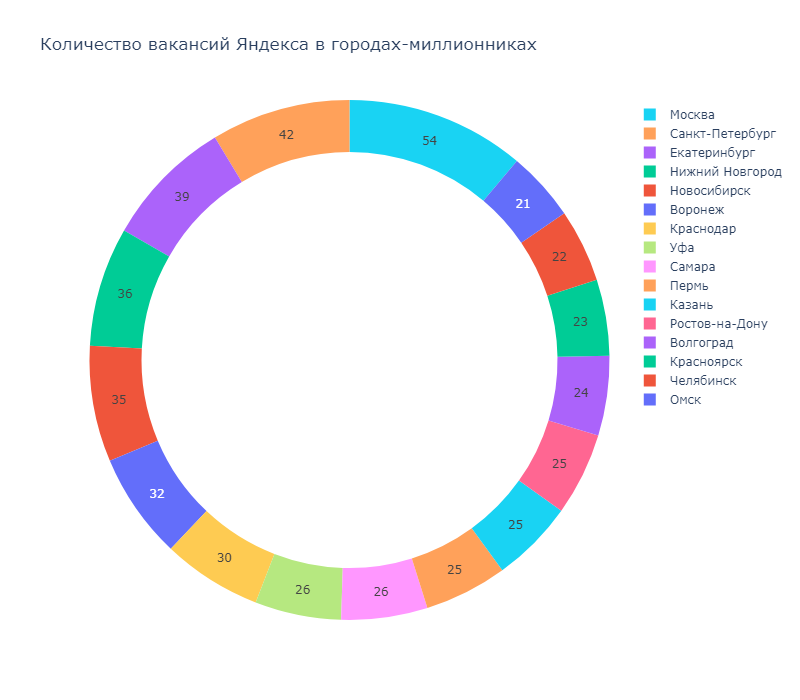

In [12]:
# результат запроса по заданию 5.7.
yandex_areas = px.pie(
    data_frame=result_5_7[result_5_7['Город'] != 'TOTAL'],
    names="Город", 
    values="Количество вакансий", 
    color='Город', 
    labels='Количество вакансий', 
    height=700, 
    width=800,
    hole=0.8, 
    title='Количество вакансий Яндекса в городах-миллионниках' 
)
yandex_areas.update_traces(hoverinfo='label+percent', textinfo='value')

yandex_areas.show("png")

Вывод: Вакансии яндекса присутствуют во всех городах-миллионниках. Наибольшее количество - в Москве (54 единицы), наименьшее - Омск (21 елиница).


***

### выводы по анализу работодателей
Лидером по количеству вакансий среди работодателей является Яндекс, далее следуют компании Ростелеком, Тинькофф, СБЕР, Газпром нефть.
Яндекс также лидирует п количеству регионов, где размещены вакансии компании. Возмжоности удаленной работы позволяют искать работников
в любом регионе, опережая по присутствию федеральные компании с территориально-распределенной сетью (Ростелеком, СБЕР, Газпром нефть)

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [17]:
# текст запроса
query_6_1 = f'''
            SELECT 
                id
            FROM 
                public.vacancies
            WHERE
                name like '%data%' 
                or
                name like '%данн%'
                or
                name like '%Data%'
                or
                name like '%DATA%'
                or
                name like '%Данн%'
                or
                name like '%ДАНН%'
            GROUP BY
                id
            
                                  
'''
result_6_1 = pd.read_sql_query(query_6_1, connection)
result_6_1

C:\Users\ak88r\AppData\Local\Temp\ipykernel_6372\3409575098.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_6_1 = pd.read_sql_query(query_6_1, connection)


,id
0,54849771
1,55100061
2,54739355
3,55079313
4,54560270
...,...
1766,54660519
1767,66073295
1768,55171423
1769,55005263


#### результат запроса по заданию 6.1.
К данным имеет отношение 1771 вакансия (3,6% от всего количества вакансий)

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [16]:
# текст запроса
query_6_2 = f'''
            SELECT 
                count(id)
            FROM 
                public.vacancies
            WHERE
                (name like '%_ata%_cientist%' 
                or
                name like '%_ata%_cience%'
                or
                name like '%_сследовател%_анных%'
                or
                (name like '%ML%'
                and
                name not like '%HTML%')
                or
                name like '%_achine%_earning%'
                or
                name like '%_ашинн%_бучен%')
                and
                (name like '%_unior%'
                or
                experience = 'Нет опыта'
                or
                employment = 'Стажировка')
                    
                                                
'''
result_6_2 = pd.read_sql_query(query_6_2, connection)
result_6_2

C:\Users\ak88r\AppData\Local\Temp\ipykernel_840\501443828.py:30: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,51


#### результат запроса по заданию 6.2.
Для начинающего дата-сайентиста найдена 51 подходящая вакансия

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [21]:
# текст запроса

query_6_3 = f'''
            SELECT 
                count(id)
            FROM 
                public.vacancies
            WHERE
                (name like '%_ata%_cientist%' 
                or
                name like '%_ata%_cience%'
                or
                name like '%_сследовател%_анных%'
                or
                (name like '%ML%'
                and
                name not like '%HTML%')
                or
                name like '%_achine%_earning%'
                or
                name like '%_ашинн%_бучен%')
                and
                (key_skills like '%SQL%'
                or
                key_skills like '%postgres%')
                       
                                                
'''
result_6_3 = pd.read_sql_query(query_6_3, connection)
result_6_3

C:\Users\ak88r\AppData\Local\Temp\ipykernel_840\1647386680.py:29: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,201


#### результат запроса по азаднию 6.3.
Навыки SQL или postgres являются ключевыми для 201 вакансии из сферы data science

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [22]:
# текст запроса
query_6_4 = f'''
            SELECT 
                count(id)
            FROM 
                public.vacancies
            WHERE
                (name like '%_ata%_cientist%' 
                or
                name like '%_ata%_cience%'
                or
                name like '%_сследовател%_анных%'
                or
                (name like '%ML%'
                and
                name not like '%HTML%')
                or
                name like '%_achine%_earning%'
                or
                name like '%_ашинн%_бучен%')
                and
                (key_skills like '%_ython%')
                       
                                                
'''
result_6_4 = pd.read_sql_query(query_6_4, connection)
result_6_4

C:\Users\ak88r\AppData\Local\Temp\ipykernel_840\2344081028.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,351


#### результат запроса по заданию 6.4.
Python встречается в требованиях 351 вакансии, относящихся к сфере data science

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [37]:
# текст запроса
query_6_5 = f'''
            SELECT 
                round(avg(length(key_skills) - length(replace(key_skills, '\t', '')) + 1),2)  avg_skills
                
            FROM 
                public.vacancies
            WHERE
                (name like '%_ata%_cientist%' 
                or
                name like '%_ata%_cience%'
                or
                name like '%_сследовател%_анных%'
                or
                (name like '%ML%'
                and
                name not like '%HTML%')
                or
                name like '%_achine%_earning%'
                or
                name like '%_ашинн%_бучен%')                                    
'''
result_6_5 = pd.read_sql_query(query_6_5, connection)
result_6_5

C:\Users\ak88r\AppData\Local\Temp\ipykernel_132\2496432957.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_6_5 = pd.read_sql_query(query_6_5, connection)


,avg_skills
0,6.41


#### результат запроса по заданию 6.5.
В среднем для вакансиях для data science указаны требования наличия 6 навыков

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [25]:
# текст запроса
query_6_6 = f'''
            SELECT
                experience "Опыт работы",
                round(avg((coalesce(salary_from, salary_to, 0) + coalesce(salary_to, salary_from, 0)) / 2), 0) "Средняя з/п"
            FROM 
                public.vacancies
            WHERE
                (name like '%_ata%_cientist%' 
                or
                name like '%_ata%_cience%'
                or
                name like '%_сследовател%_анных%'
                or
                (name like '%ML%'
                and
                name not like '%HTML%')
                or
                name like '%_achine%_earning%'
                or
                name like '%_ашинн%_бучен%')
                and
                (salary_from is not null
                or
                salary_to is not null)
            GROUP BY 
               experience            
                                                
'''
result_6_6 = pd.read_sql_query(query_6_6, connection)
result_6_6

C:\Users\ak88r\AppData\Local\Temp\ipykernel_840\3179184557.py:30: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Опыт работы,Средняя з/п
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


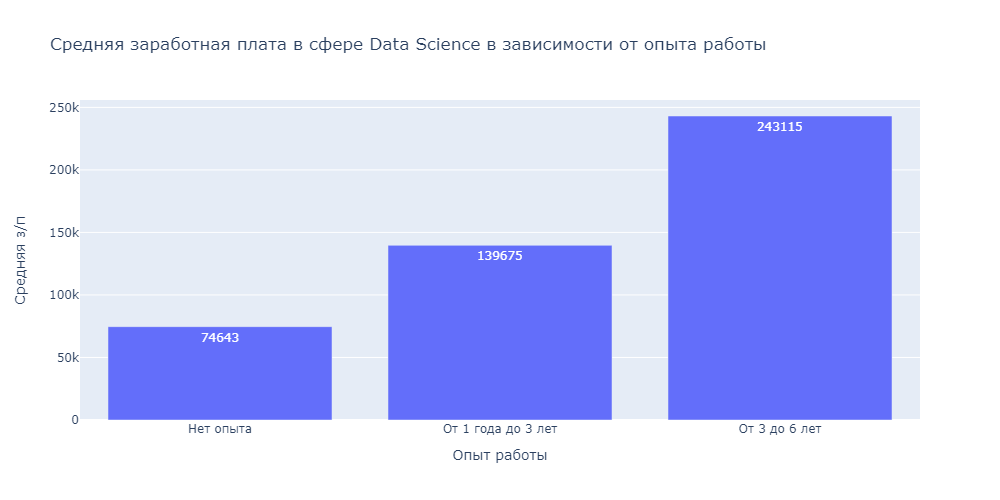

In [27]:
# результат запроса по заданию 6.6.
fig = px.bar(
    data_frame=result_6_6, 
    x="Опыт работы", 
    y="Средняя з/п", 
    #color='country', 
    text = 'Средняя з/п', 
    orientation='v', 
    height=500, 
    width=1000, 
    title='Средняя заработная плата в сфере Data Science в зависимости от опыта работы' 
)

fig.show("png")

***

### выводы по предметному анализу
Предметный анализ проведен в отношении вакансий, имеющих отношение к данным.
В базе данных имеет отношение к данным 1771 вакансия, 481 вакансия - к data sceince.
В среднем от специалистов в области data sceince требуется 6 навыков. 
Требование навыков Python встречается в 73% вакансий data science, SQL - 41%. 
51 вакансия, или 10,6% от числа вакансий для DS, ориентирована на начинающих специалистов.
Средний заработок специалистов в сфере data science с опытом взрастает - начиинающим специалистам
в среднем предлагается 70 тысяч рублей, с опытом 3 и более лет уже предлагается 243 тысячи рублей. 

## Общий вывод по проекту

В базе данных представлены сведения о 49197 вакансиях от 23501 работодателя из 294 сфер деятельности, размещенных в 1362 регионах
Топ-5 регионов по количеству вакансий: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы
Вакансии сосредоточены в городах-миллионниках, в основном к соискателям
предъявляются требования наличия минимального опыта работы, готовности к полной занятости полный рабочий день. Предложения
по заработной плате начинаются в среднем от 70 тысяч рублей, при этом более половины вакансий не содержит сведений об уровне
вознаграждения, что, вероятно, связано с предпочтением работодателей обсуждать уровень оплаты труда на стадии собеседования.
Лидером по количеству вакансий среди работодателей является Яндекс, далее следуют компании Ростелеком, Тинькофф, СБЕР, Газпром нефть.
Яндекс также лидирует по количеству регионов, где размещены вакансии компании. Возмжоности удаленной работы позволяют искать работников
в любом регионе, опережая по количеству регионов с вакансиями федеральные компании с территориально-распределенной сетью (Ростелеком, СБЕР, Газпром нефть)
Отношение к данным имеет 1771 вакансия, к сфере data sceince - 481. В среднем к соискателям на позиции в сфере data sceince предъявляется требование
 наличия 6 навыков: требование знанияязыка Python встречается в 73% вакансий DS , SQL или postgres - в 41%. Уровень дохода в сфере data sceince возрастает
 с опытом работы: начинающим специалистам предлагается в среднем 70 тысяч рублей, с опытом от 3 лет и более - 243 тысячи рублей.
Лидер по количеству вакансий по направлению data sceince - Москва (45% от числа вакансий DS)
В тройку компаний-лидеров по количеству вакансий DS хводят банки СБЕР и ВТБ, IT-компания Bell Integrator
66,5% вакансий data sceince предполагают полную занятость полный рабочий день. На втором месте - полная занятость в формате удаленной работы (23%)

# 7. Дополнительный анализ

In [10]:
query_7_1 = f'''
            SELECT
                a.name "Регион",
                count(v.id) "Количество вакансий"
            FROM 
                public.vacancies v
            JOIN
                public.areas a
                ON
                a.id = v.area_id
            WHERE
                (v.name like '%_ata%_cientist%' 
                or
                v.name like '%_ata%_cience%'
                or
                v.name like '%_сследовател%_анных%'
                or
                (v.name like '%ML%'
                and
                v.name not like '%HTML%')
                or
                v.name like '%_achine%_earning%'
                or
                v.name like '%_ашинн%_бучен%')
            GROUP BY 
                a.name
            ORDER BY
                2 DESC
            LIMIT 10                                                             
'''
result_7_1 = pd.read_sql_query(query_7_1, connection)
result_7_1

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16596\2807138276.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_7_1 = pd.read_sql_query(query_7_1, connection)


,Регион,Количество вакансий
0,Москва,219
1,Санкт-Петербург,65
2,Новосибирск,23
3,Нижний Новгород,20
4,Казань,16
5,Алматы,16
6,Минск,9
7,Томск,8
8,Екатеринбург,7
9,Армения,6


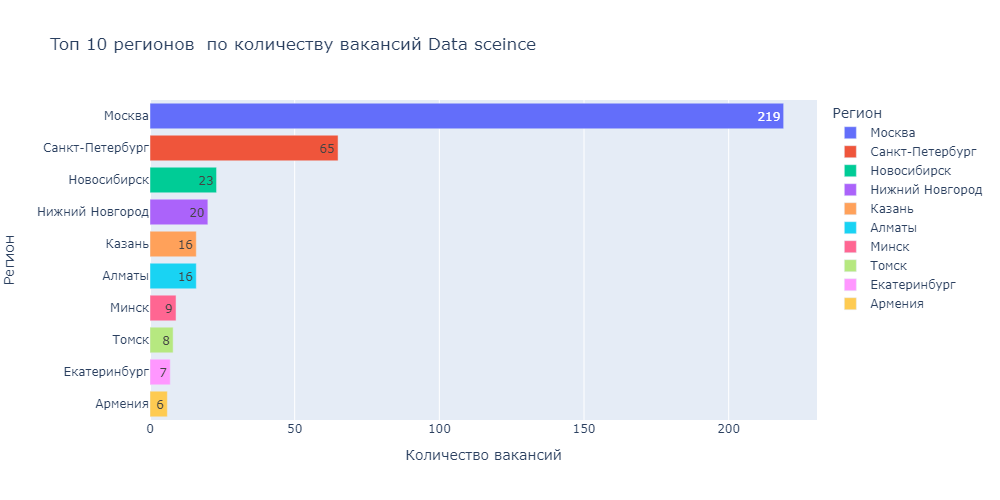

In [17]:
# результат дополнительного запроса 7.1.
emp_areas = px.bar(
    data_frame=result_7_1,
    y="Регион", 
    x="Количество вакансий", 
    color='Регион', 
    text = 'Количество вакансий', 
    orientation='h', 
    height=500, 
    width=1000,
    , 
    title='Toп 10 регионов  по количеству вакансий Data sceince' 
)


emp_areas.show("png")

#### результат дополнительного запроса 7.1.
Лидер по количеству вакансий по направлению data sceince - Москва (45% от числа вакансий DS)

In [21]:
query_7_2 = f'''
            SELECT
                e.name "Работодатель",
                count(v.id) "Количество вакансий"
            FROM 
                public.vacancies v
            JOIN
                public.employers e
                ON
                e.id = v.employer_id
            WHERE
                (v.name like '%_ata%_cientist%' 
                or
                v.name like '%_ata%_cience%'
                or
                v.name like '%_сследовател%_анных%'
                or
                (v.name like '%ML%'
                and
                v.name not like '%HTML%')
                or
                v.name like '%_achine%_earning%'
                or
                v.name like '%_ашинн%_бучен%')
            GROUP BY 
                e.name
            ORDER BY
                2 DESC
            LIMIT 10                                                             
'''
result_7_2 = pd.read_sql_query(query_7_2, connection)
result_7_2

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16596\325643863.py:31: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатель,Количество вакансий
0,СБЕР,38
1,Bell Integrator,25
2,Банк ВТБ (ПАО),18
3,VK,15
4,Positive Technologies,11
5,Яндекс,9
6,EvenBet Gaming,9
7,МегаФон,8
8,Andersen,7
9,Ozon,6


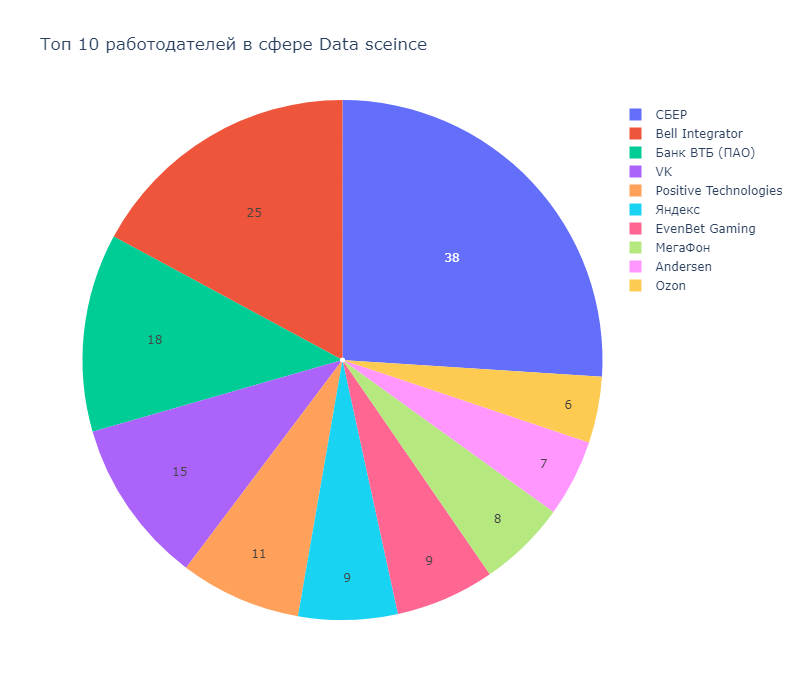

In [25]:
# результат дополнительного запроса 7.2.
yandex_areas = px.pie(
    data_frame=result_7_2,
    names="Работодатель", 
    values="Количество вакансий", 
    color='Работодатель', 
    labels='Количество вакансий', 
    height=700, 
    width=800,
    hole=0.01, 
    title='Топ 10 работодателей в сфере Data sceince' 
)
yandex_areas.update_traces(hoverinfo='label+percent', textinfo='value')

yandex_areas.show("png")

#### результат дополнительного запроса 7.2.
В тройку компаний-лидеров по количеству вакансий DS хводят банки СБЕР и ВТБ, IT-компания Bell Integrator

In [34]:
query_7_3 = f'''
            SELECT
                schedule "Рабочий график",
                employment "Тип трудоустройства",
                COUNT(id) "Количество вакансий"
            FROM 
                public.vacancies
            WHERE
                (name like '%_ata%_cientist%' 
                or
                name like '%_ata%_cience%'
                or
                name like '%_сследовател%_анных%'
                or
                (name like '%ML%'
                and
                name not like '%HTML%')
                or
                name like '%_achine%_earning%'
                or
                name like '%_ашинн%_бучен%')

            GROUP BY 
                schedule, employment
            ORDER BY
                3 DESC            
                                                
'''
result_7_3 = pd.read_sql_query(query_7_3, connection)
result_7_3

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16596\1236036284.py:29: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Рабочий график,Тип трудоустройства,Количество вакансий
0,Полный день,Полная занятость,320
1,Удаленная работа,Полная занятость,111
2,Гибкий график,Полная занятость,37
3,Гибкий график,Частичная занятость,4
4,Удаленная работа,Частичная занятость,3
5,Удаленная работа,Проектная работа,3
6,Полный день,Стажировка,2
7,Гибкий график,Стажировка,2
8,Полный день,Частичная занятость,1


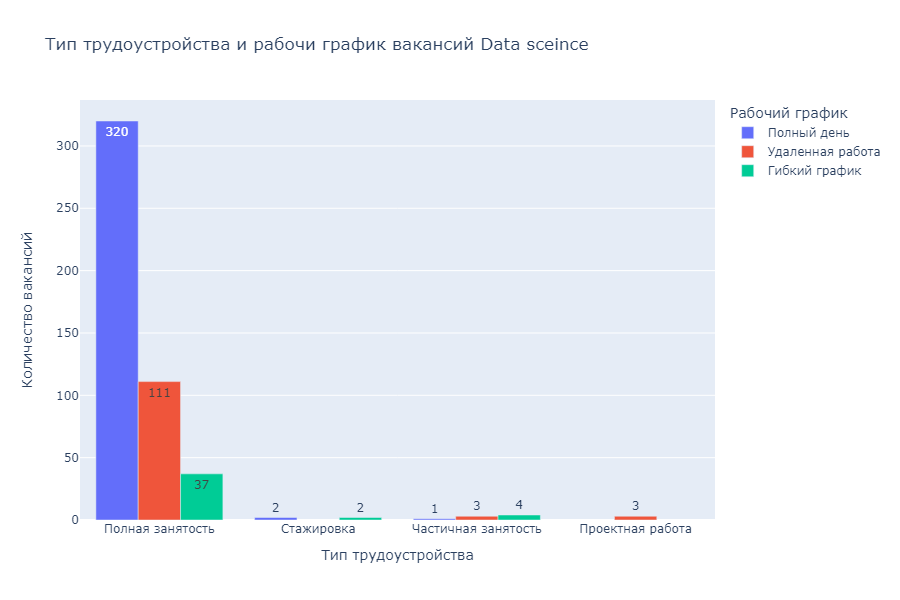

In [39]:
# результат дополнительного запроса 7.3.
vacancies_ds_count = px.bar(
    data_frame = result_7_3,
    x = 'Тип трудоустройства',
    y = 'Количество вакансий',
    color = 'Рабочий график',
    text = 'Количество вакансий',
    barmode='group',
    orientation = 'v',
    height = 600,
    width = 900,
    title = 'Тип трудоустройства и рабочи график вакансий Data sceince'
    )

vacancies_ds_count.show("png")

#### результат дополнительного запроса 7.3.
66,5% вакансий data sceince предполагают полную занятость полный рабочий день.
На втором месте - полная занятость в формате удаленной работы (23%).